
# Ex 2 Visualizing ADAM Optimization on a Simple Polynomial Cost Function

This notebook demonstrates how the ADAM optimizer performs on a simple 2D polynomial cost function with multiple local minima.

We'll define a cost function with several quadratic basins and show how ADAM, thanks to its momentum and adaptive step sizes, efficiently finds a minimum without getting stuck in local traps.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


**bold text**
## The Cost Function

We consider the following 2D function:

\[
J(x, y) = (x^2 - 1)^2 + (y^2 - 2)^2
\]

This function has four symmetric minima at:
- \( x = \pm 1 \)
- \( y = \pm \sqrt{2} \)

It is an ideal case to test optimizers on non-convex landscapes.


In [2]:
# Cost function: polynomial with multiple minima and analytic gradient available
def example_fun_with_grad(x):
    a, b = x
    J = (a**2 - 1)**2 + (b**2 - 2)**2
    grad = np.array([4 * a * (a**2 - 1), 4 * b * (b**2 - 2)])
    return J, grad


In [3]:
def adam_optimize(func, x0, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000, tol=1e-6, **kwargs):
    """
    ADAM optimization to minimize a callable function with a cost and gradient.

    Parameters:
    -----------
    func : callable
        A function that returns a tuple (J(x), grad J(x)), where J is the cost and grad J is the gradient.

    x0 : numpy array
        Initial guess for the parameter vector.

    lr : float
        Learning rate for the ADAM optimizer.

    beta1 : float
        Exponential decay rate for the first moment estimate.

    beta2 : float
        Exponential decay rate for the second moment estimate.

    epsilon : float
        Small constant to avoid division by zero.

    max_iter : int
        Maximum number of iterations.

    tol : float
        Tolerance for convergence.

    **kwargs : dict
        Extra arguments passed to the function `func(x, **kwargs)`.

    Returns:
    --------
    result : dict
        Dictionary containing:
            - x: Final optimized parameters
            - final_cost: Cost at the solution
            - iterations: Number of iterations performed
            - converged: Whether convergence criterion was met
            - history: Dictionary with 'costs' and 'parameters' over iterations
    """
    x = np.array(x0, dtype=np.float64)
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    t = 0  # iteration counter

    history = {
        "costs": [],
        "parameters": []
    }

    for _ in tqdm(range(max_iter), desc="Optimizing with ADAM"):
        t += 1
        J, grad = func(x, **kwargs)
        history["costs"].append(J)
        history["parameters"].append(x.copy())

        # Update biased moment estimates
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # Bias correction
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        # Update parameters
        x_prev = x
        x = x - lr * m_hat / (np.sqrt(v_hat) + epsilon)

        # Check convergence
        if np.linalg.norm(x - x_prev) < tol:
            return {
                "x": x,
                "final_cost": J,
                "iterations": t,
                "converged": True,
                "history": history
            }

    return {
        "x": x,
        "final_cost": J,
        "iterations": max_iter,
        "converged": False,
        "history": history
    }


In [13]:
# Run optimizer
result = adam_optimize(example_fun_with_grad, x0=np.array([-3.0, -3.0]),max_iter=5000)
x_opt = result["x"]
cost_min = result["final_cost"]
history = result["history"]

print(f"Optimal point found: {x_opt}")
print(f"Final cost: {cost_min}")
print(f"Converged: {result['converged']} in {result['iterations']} iterations")

Optimizing with ADAM: 100%|██████████| 5000/5000 [00:00<00:00, 16782.28it/s]


Optimal point found: [-1.07462242 -1.41860238]
Final cost: 0.02417950068240554
Converged: False in 5000 iterations


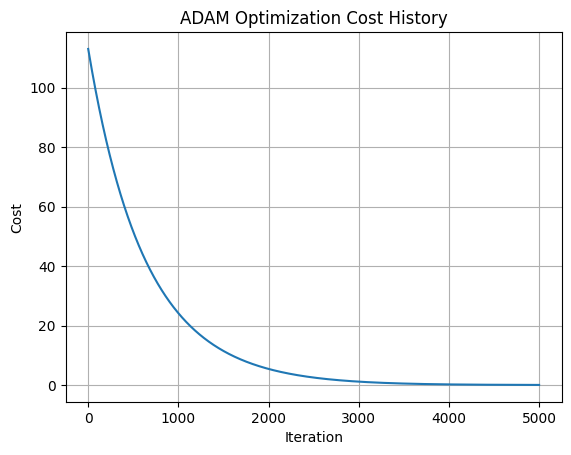

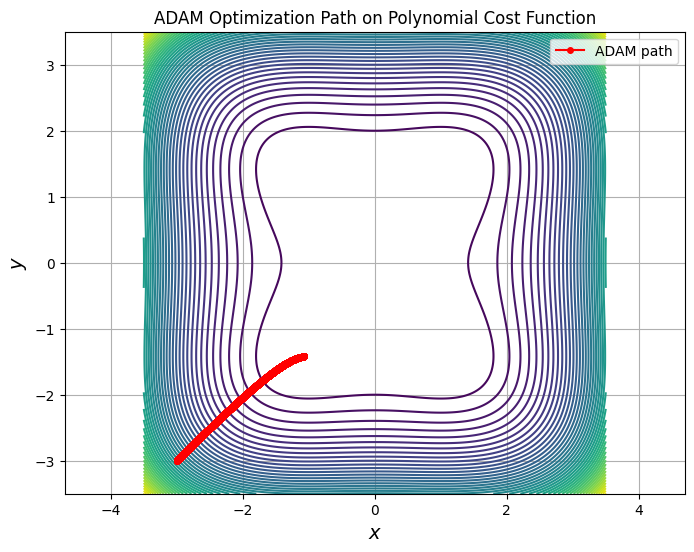

In [14]:

params = np.array(history["parameters"])

# Plot cost history
plt.figure()
plt.plot(history["costs"])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("ADAM Optimization Cost History")
plt.grid(True)
plt.show()

# Generate contour plot
x_vals = np.linspace(-3.5, 3.5, 300)
y_vals = np.linspace(-3.5, 3.5, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X**2 - 1)**2 + (Y**2 - 2)**2

# Plot contour and path
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(params[:, 0], params[:, 1], 'o-', color='red', markersize=4, label='ADAM path')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.title('ADAM Optimization Path on Polynomial Cost Function')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()